# Determining the Cost vs Size Estimates for Different Tasks
We want to be able to get an estimate of time to relax a compute and compute a gradient

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.stats import siegelslopes
import pandas as pd
import numpy as np

## Load in the Data
Get the small and normal basis sets

In [2]:
diffuse_data = pd.read_csv('datasets/diffuse-basis_vertical-xtb_redox.csv')

In [3]:
normal_data = pd.read_csv('datasets/normal-basis_redox.csv')

In [4]:
small_data = pd.read_csv('datasets/small-basis_redox.csv')

In [5]:
xtb_data = pd.read_csv('datasets/xtb_redox.csv')

## Plot the Cost as a Function of Size for DFT
Get a single-node estimate for the performance

B3LYP/3-21g: 1.71
B3LYP/6-31g(2df-p): 2.49
B3LYP/6-311++g**: 2.59


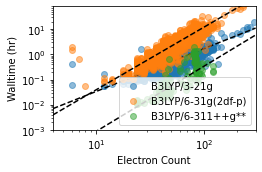

In [6]:
fig, ax = plt.subplots(figsize=(3.75, 2.5))

ax.set_xlim(4, 300)

for l, data in zip(['B3LYP/3-21g', 'B3LYP/6-31g(2df-p)', 'B3LYP/6-311++g**'], [small_data, normal_data, diffuse_data]):
    # Plot each point
    data = data[~data['wall_time_IP'].isnull()]
    ax.loglog(data['n_electrons'], data['wall_time_IP'] / 3600, 'o', alpha=0.5, label=l)
    
    # Compute a slope
    m, b = siegelslopes(np.log10(data['wall_time_IP'] / 3600), np.log10(data['n_electrons']))
    print(f'{l}: {m:.2f}')
    ax.plot(ax.get_xlim(), np.power(10, np.multiply(m, np.log10(ax.get_xlim())) + b), '--k')
  
ax.legend()
ax.set_ylim(0.001, 80)
ax.set_xlabel('Electron Count')
ax.set_ylabel('Walltime (hr)')

fig.tight_layout()
fig.savefig('figures/nwchem-cost-vs-size.pdf')

## Plot the Histogram of the XTB
Get an idea how cheap it is

In [7]:
xtb_data['n_atoms'].describe()

count    4520.000000
mean        9.288717
std         3.829753
min         1.000000
25%         7.000000
50%         7.000000
75%        13.000000
max        48.000000
Name: n_atoms, dtype: float64

In [8]:
xtb_data['wall_time_IP'].describe() / 3600

count    1.255000
mean     0.016209
std      0.014309
min      0.000218
25%      0.006870
50%      0.011948
75%      0.021351
max      0.243435
Name: wall_time_IP, dtype: float64

XTB: 1.30


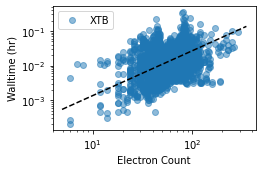

In [9]:
fig, ax = plt.subplots(figsize=(3.75, 2.5))

for l, data in zip(['XTB'], [xtb_data]):
    # Plot each point
    data = data[~data['wall_time_IP'].isnull()]
    ax.loglog(data['n_electrons'], data['wall_time_EA'] / 3600, 'o', alpha=0.5, label=l)
    
    # Compute a slope
    m, b = siegelslopes(np.log10(data['wall_time_IP'] / 3600), np.log10(data['n_electrons']))
    print(f'{l}: {m:.2f}')
    ax.plot(ax.get_xlim(), np.power(10, np.multiply(m, np.log10(ax.get_xlim())) + b), '--k')
  
ax.legend()
#ax.set_xlim(8, 300)
#ax.set_ylim(0.03, 70)
ax.set_xlabel('Electron Count')
ax.set_ylabel('Walltime (hr)')

fig.tight_layout()
fig.savefig('figures/xtb-cost-size.svg')